In [3]:
import pandas as pd
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [5]:
# Collecting Bitcoin data price from yahoo:
df = yf.download('BTC-USD')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


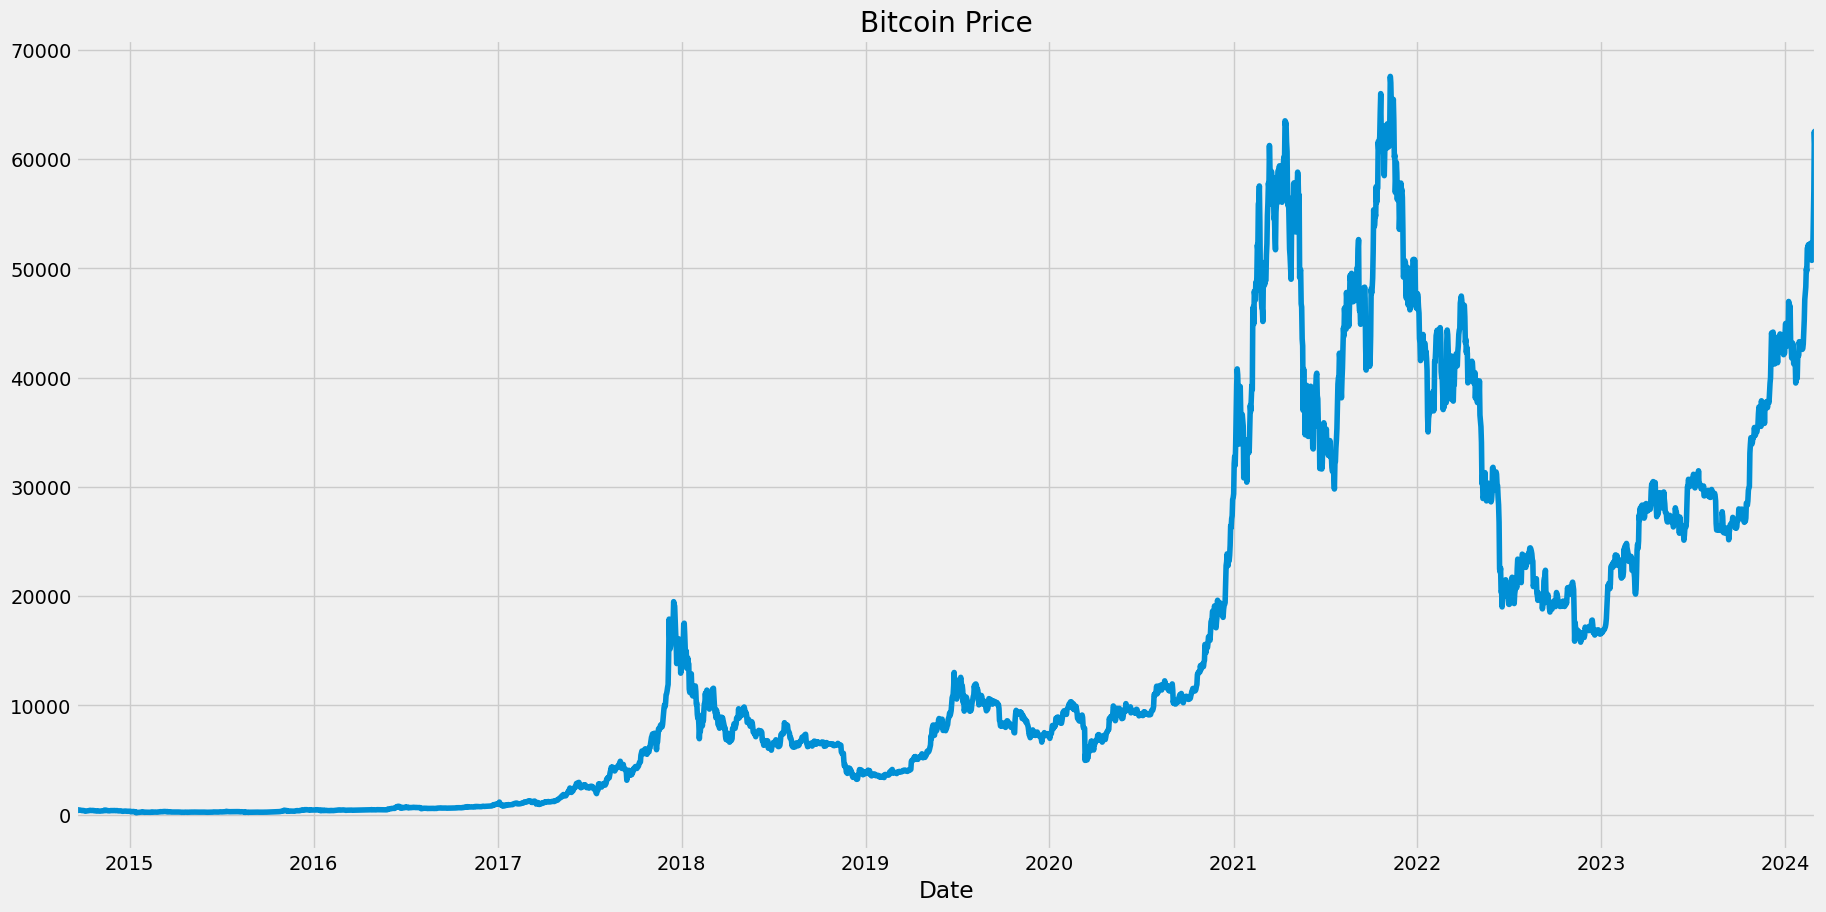

In [6]:
# Visualizing Bitcoin data price:
plt.figure(figsize=(20,10))
plt.title('Bitcoin Price')
df.Close.plot();

In [7]:
# Creating dataset for train:
data = df.Close
dataset = data.values
train_len = int(len(dataset) * .7)
dataset

array([  457.33401489,   424.44000244,   394.79598999, ...,
       62440.6328125 , 62029.84765625, 62767.04296875])

In [8]:
# Scale the data:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))
scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.92393096],
       [0.91783521],
       [0.92877466]])

In [9]:
# Create the training data set:
train_data = scaled_data[0:train_len, :]
# Split the data into x_train and y_train data sets:
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])

In [10]:
# Concert the x_train and y_train to numpy arrays:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# Reshape the data:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2359, 60, 1)

In [12]:
# Build the LSTM model:
model = Sequential()

NameError: name 'Sequential' is not defined

In [ ]:
model.add(LSTM(50, return_sequences=True, input_shape=(60,1), activation='relu'))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1216/1216 [==============================] - 82s 67ms/step - loss: 0.0029


In [ ]:
# Create the testing data set:

# Create a new array containing scaled values from index 1216 to 1823:
test_data = scaled_data[train_len - 60: , : ]
# Create the data sets x_test and y_test:
x_test = []
y_test = dataset[train_len:]


for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

In [ ]:
# Covert the dat to a numpy array:
x_test = np.array(x_test)

In [ ]:
# Reshape the data:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(547, 60, 1)

In [ ]:
# Get the models predicted price values:
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)

In [ ]:
# Get the root mean squared error (RMSE):
rmse = np.sqrt(np.mean(predict - y_test) ** 2)
rmse

1175.0587990602148

In [ ]:
# Plot the data:
train = data[:train_len]
valid = data[train_len:]

(547,)